In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)


1.14.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 23s 5us/step


In [3]:
train_images.shape

(60000, 28, 28)

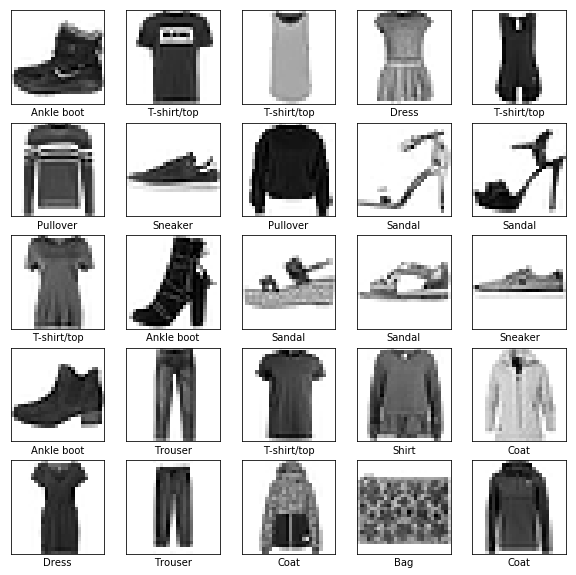

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.fit(train_images,train_labels, epochs=7)


Epoch 1/7
60000/60000 [==============================] - 5s 88us/sample - loss: 3.7569 - acc: 0.6901
Epoch 2/7
60000/60000 [==============================] - 5s 90us/sample - loss: 0.6728 - acc: 0.7553
Epoch 3/7
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5626 - acc: 0.7990
Epoch 4/7
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5378 - acc: 0.8130
Epoch 5/7
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5208 - acc: 0.8199
Epoch 6/7
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5044 - acc: 0.8281
Epoch 7/7
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4845 - acc: 0.8322


In [17]:
val_loss, val_acc=model.evaluate(test_images,test_labels)
print("Loss: ",val_loss,"Accuray: ", val_acc)


10000/10000 [==============================] - 0s 49us/sample - loss: 0.5661 - acc: 0.8160
Loss:  0.5661001687288284 Accuray:  0.816


In [18]:
predictions=model.predict(test_images)

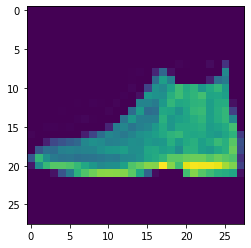

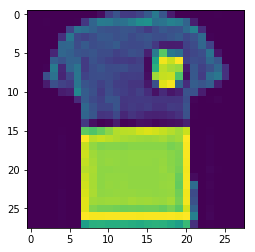

T-shirt/top


In [12]:
test=120

plt.imshow(test_images[test])
plt.show()

print(class_names[np.argmax(predictions[test])])

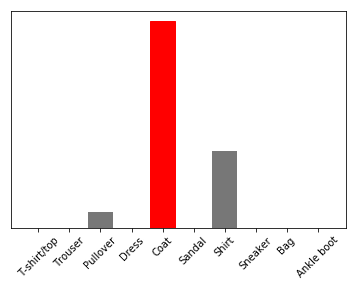

Coat


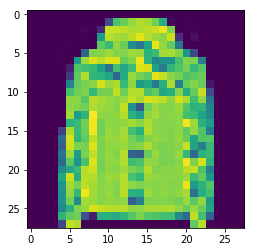

In [19]:
#Analysis of our model

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


    
test_image=130
img=test_images[test_image]
img=(np.expand_dims(img,0))

prediction=model.predict(img)

plot_value_array(0,prediction,test_labels)
plt.xticks(range(10),class_names,rotation=45)
plt.show()
plt.imshow(test_images[test_image])
print(class_names[np.argmax(predictions[test_image])])
plt.show()